In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
!unzip /content/bike+sharing+dataset.zip

Archive:  /content/bike+sharing+dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


# Part A : Data Preprocessing and Baseline

1. Data Loading and Feature Engineering

In [3]:
hour_df=pd.read_csv('/content/hour.csv')
hour_df=hour_df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

In [4]:
hour_df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [5]:
categorical_cols=['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit']
encoded_hour_df=pd.get_dummies(hour_df, columns=categorical_cols, drop_first=False, dtype=int)

In [6]:
encoded_hour_df

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.2879,0.81,0.0000,16,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0.22,0.2727,0.80,0.0000,40,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0.22,0.2727,0.80,0.0000,32,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0.24,0.2879,0.75,0.0000,13,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0.24,0.2879,0.75,0.0000,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0,1,0.26,0.2576,0.60,0.1642,119,1,0,0,...,1,0,0,0,0,0,0,1,0,0
17375,0,1,0.26,0.2576,0.60,0.1642,89,1,0,0,...,1,0,0,0,0,0,0,1,0,0
17376,0,1,0.26,0.2576,0.60,0.1642,90,1,0,0,...,1,0,0,0,0,0,1,0,0,0
17377,0,1,0.26,0.2727,0.56,0.1343,61,1,0,0,...,1,0,0,0,0,0,1,0,0,0


2. Train/Test split

In [7]:
X=encoded_hour_df.drop(columns=['cnt'])
y=encoded_hour_df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Baseline Model (Single Regressor)

Decision Tree Regressor

In [8]:
dtr=DecisionTreeRegressor(max_depth=6)
dtr.fit(X_train, y_train)
y_pred_dtr=dtr.predict(X_test)
dtr_rmse=root_mean_squared_error(y_test, y_pred_dtr)
print(f'The Root Mean Squared Error (RMSE) for Decision Tree Regressor = {dtr_rmse:.4f}')

The Root Mean Squared Error (RMSE) for Decision Tree Regressor = 118.5585


Linear Regression

In [9]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
lr_rmse=root_mean_squared_error(y_test, y_pred_lr)
print(f'The Root Mean Squared Error (RMSE) for Linear Regression = {lr_rmse:.4f}')

The Root Mean Squared Error (RMSE) for Linear Regression = 100.4459


The RMSE obtained using the Linear Regression model is lower than the RMSE obtained using Decision Tree Regressor and hence, Linear Regression is a better model and shall be considered as the baseline performance metric

# Part B : Ensemble Techniques for Bias and Variance Reduction

In [10]:
bgr=BaggingRegressor(estimator=dtr, n_estimators=50, max_samples=0.8, random_state=42)
bgr.fit(X_train, y_train)
y_pred_bgr=bgr.predict(X_test)
bgr_rmse=root_mean_squared_error(y_test, y_pred_bgr)
print(f'The Root Mean Squared Error (RMSE) for Bagging Regressor = {bgr_rmse:.4f}')

The Root Mean Squared Error (RMSE) for Bagging Regressor = 111.8029


A single decision tree regressor is sensitive to fluctuations in the training data, which can lead to high variance and overfitting. Bagging (Boostrap Aggregation) counters this by training several decision trees on different subsamples/partitions of the original training data. The predictions of individual trees are then averaged. Hence, the overall prediction becomes less sensitive to the possibly fluctuated predictions of a single decision tree (reduces overfitting). Thus, the overall outputs have lower variance and are able to generalize better on unseen data.

In [11]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr=gbr.predict(X_test)
gbr_rmse=root_mean_squared_error(y_test, y_pred_gbr)
print(f'The Root Mean Squared Error (RMSE) for Gradient Boosting Regressor = {gbr_rmse:.4f}')

The Root Mean Squared Error (RMSE) for Gradient Boosting Regressor = 79.8960


The gradient boosting algorithm achieves a better result (lower RMSE) than the single baseline Linear Regression model and the bagging ensemble of Decision Tree Regressors.

Linear Regression has high bias when the relationship between features and target is not strictly linear. The model tries to fit a simpler linear function to non-linear, complex data, resulting in underfitting.

Bagging decision trees effectively reduce the variance by averaging diverse results of every decision tree. This reduces the tendency of the overall model to overfit the data, thereby reducing the variance. However, averaging does not reduce the inherent bias of every decision tree, which can be moderate, if the trees are not deep enough or when the base learners are unable to capture all patterns.

Gradient boosting primarily focuses on reducing model bias by sequentially adding new trees that learn to predict the errors (residuals) of the combined model so far, correcting mistakes at each iteration. With each step, the algorithm fits residuals of the preceding model, which reduces the overall bias in the final predictions.

Thus, by combining weak learners (shallow trees) in a boosting framework, gradient boosting builds a predictor that can fit complex, non linear functions more accurately, yiedling a lower bias and as a result, a lower RMSE than either linear regression or bagged tree ensembles.

# Part C : Stacking for Optimal Performance

Stacking is an ensemble machine learning technique that combines predictions from several diverse base models to train a meta model to make a final and more accurate prediction. This is a multi-layer process wherein the base models (level-0) are trained first on the complete training data and then their outputs are fed into the meta-model (level 1). The meta learner does not simply average the predictions of the base model (like bagging) and weighs the correctness of their predictions to give the final output.

**Base learners (Level-0)** : Multiple models are trained separately on the same training data. Their outputs (predictions) for the data are collected.

**Meta Learner (Level-1)** : The predictions from all base learners are input features for the meta model, usually trained on out-of-fold or holdout predictions to avoid overfitting.

In the optimal case, the meta-learner, by seeing how the base model predictions relate to the true outcome, can learn which models to trust more in specific situations, or how to weight or blend the outputs.

In [12]:
ridge_model=RidgeCV(alphas=np.logspace(-3, 3, 7))
kn_regressor=KNeighborsRegressor()

base_learners=[('k-neighbors regressor', kn_regressor), ('bagging regressor', bgr), ('gradient boosting regressor', gbr)]
meta_learner=ridge_model

stack_model=StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

stack_model.fit(X_train, y_train)
y_pred_stack=stack_model.predict(X_test)
stack_rmse=root_mean_squared_error(y_test, y_pred_stack)
print(f'The Root Mean Squared Error (RMSE) for Stacking Regressor = {stack_rmse:.4f}')

The Root Mean Squared Error (RMSE) for Stacking Regressor = 70.5969


# Part D : Final Analysis

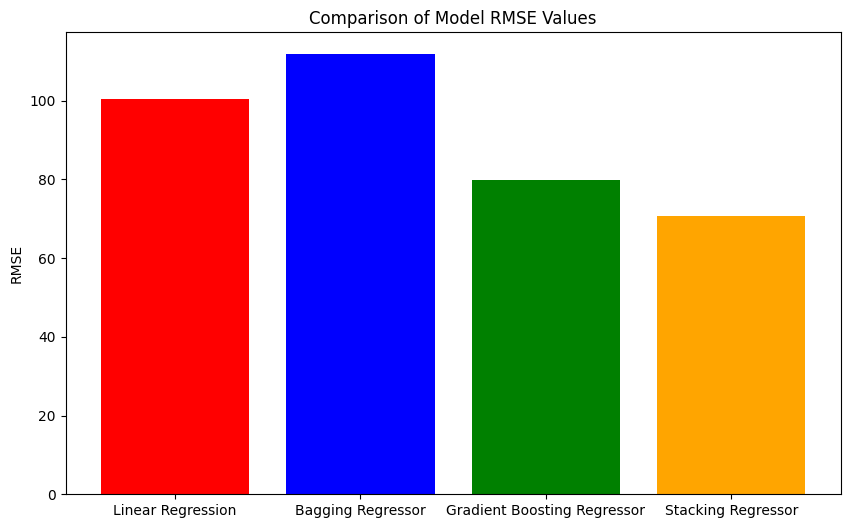

In [16]:
models = ['Linear Regression', 'Bagging Regressor', 'Gradient Boosting Regressor', 'Stacking Regressor']
rmse_values = [lr_rmse, bgr_rmse, gbr_rmse, stack_rmse]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['red', 'blue', 'green', 'orange'])
plt.ylabel('RMSE')
plt.title('Comparison of Model RMSE Values')
plt.show()

| Model                         | RMSE Value |
|-------------------------------|-------------|
| Baseline Model (Linear Regression) | 100.4459 |
| Bagging Regressor                  | 111.8029 |
| Gradient Boosting Regressor        | 79.8960  |
| Stacking Regressor                 | 70.5969  |

The **Stacking Regressor** is the best performing model with the lowest RMSE

Stacking combines the predictions from multiple base learners (which can include linear as well as non-linear models). Combining different models reduces the overall prediction variance as it reduces the tendency of individual baseline models to overfit the training data. Instead of simply averaging the results of the baseline models, the meta learner learns to weight and blend these disparate predictions, thereby reducing the bias as well. This optimal combination allows stacking to adaptively exploit each model's advantages, resulting in more robust, accurate predictions and a lower RMSE by leveraging model diversity to optimize the bias-variance trade-off.